# Week 4 Challenge

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the dataset

In [2]:
data= pd.read_csv("AdSmartABdata.csv", parse_dates= ['date'], index_col= ['date'])

In [3]:
data.head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-10,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-03,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
data.tail()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-05,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,7,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-03,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-04,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,9,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,15,Samsung SM-A515F,6,Samsung Internet,0,0
2020-07-10,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,14,Samsung SM-G960F,6,Facebook,0,0


## Data Overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8077 entries, 2020-07-10 to 2020-07-10
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   hour         8077 non-null   int64 
 3   device_make  8077 non-null   object
 4   platform_os  8077 non-null   int64 
 5   browser      8077 non-null   object
 6   yes          8077 non-null   int64 
 7   no           8077 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 567.9+ KB


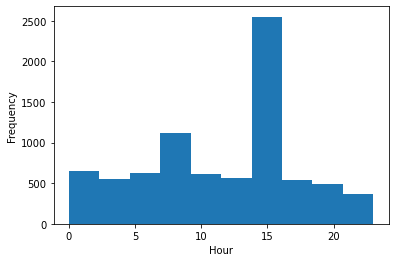

In [6]:
data['hour'].plot.hist()
plt.xlabel('Hour');

### From the above overview of the Hour's column, it could be noticed that most of the Ads were shown in the 15hrs of the day.

In [7]:
data['platform_os'].unique()

array([6, 5, 7], dtype=int64)

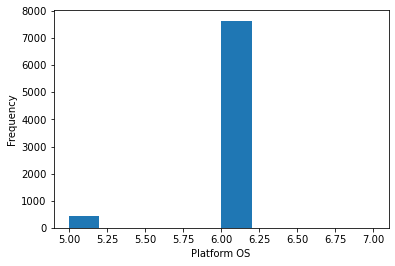

In [8]:
data['platform_os'].plot.hist()
plt.xlabel('Platform OS');

### The id of the OS the user has is between 5 - 7

### Online Users in both ```exposed``` and ```control```

In [9]:
data.query('experiment == "exposed"').head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-10,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-04,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
2020-07-06,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


In [10]:
data.query('experiment == "control"').head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,,
2020-07-03,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-03,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,15,Samsung SM-G960F,6,Facebook,0,0
2020-07-03,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-09,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,5,Samsung SM-G973F,6,Facebook,0,0


In [11]:
# difference between control and exposed experiment
cediff=data.pivot_table(index= 'experiment', values= ['yes', 'no'], aggfunc= 'sum', margins= True)
cediff

,no,yes
experiment,,
control,322,264
exposed,349,308
All,671,572


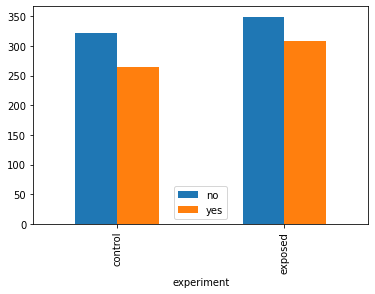

In [12]:
cediff.iloc[:2, :].plot.bar();

### From above visual, it could be noticed that the rate of ```No``` for both the ```Control``` and ```exposed``` is much more than that of ```Yes```

In [13]:
# The browser user used for the Bio
browser_exp= data.pivot_table(index= 'browser', values= ['yes', 'no'], aggfunc= 'sum')
browser_exp

,no,yes
browser,,
Android,0,0
Chrome,1,1
Chrome Mobile,381,314
Chrome Mobile WebView,111,116
Chrome Mobile iOS,0,1
Edge Mobile,0,0
Facebook,87,69
Firefox Mobile,0,0
Mobile Safari,10,4


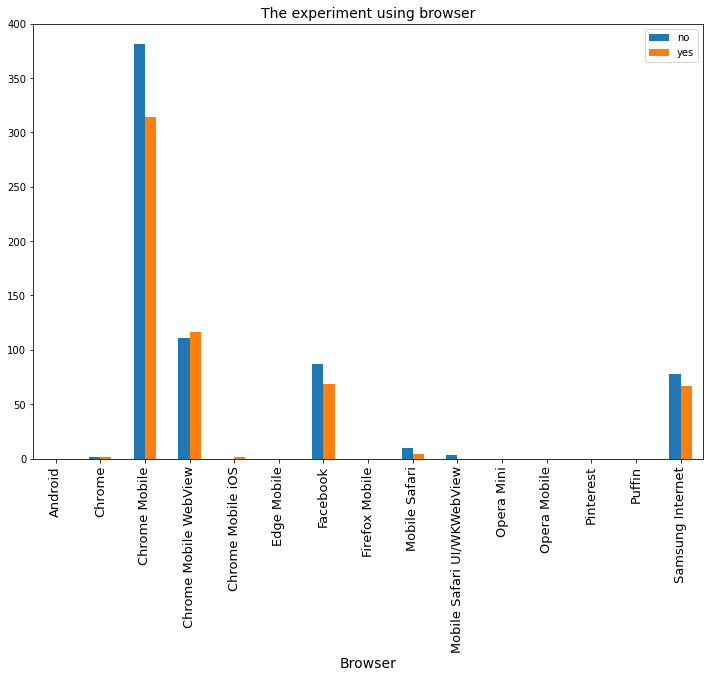

In [14]:
browser_exp.plot.bar(figsize= (12, 8)).set_title('The experiment using browser', fontsize= 14)
plt.xticks(fontsize= 13)
plt.xlabel('Browser', fontsize= 14);

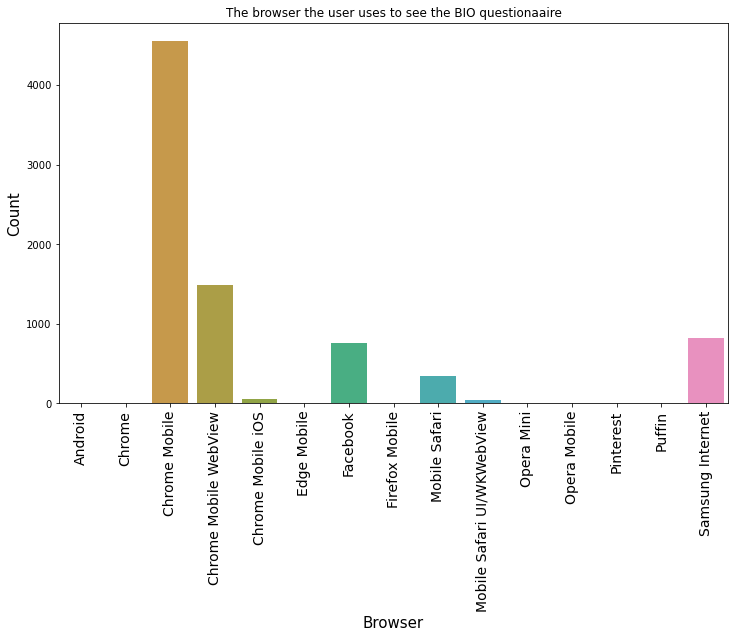

In [15]:
plt.figure(figsize= (12, 7))
sns.countplot(data['browser'].sort_values())
plt.xticks(rotation= 90, fontsize= 14)
plt.xlabel('Browser', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title('The browser the user uses to see the BIO questionaaire');

### Most of the users use ```Chrome Mobile```, ```Chrome Mobile WebView``` and ```Samsung Internet``` to see the BIO questionnaire